# Ejercicios Práctica 1

In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

## Crear una imagen con la textura de un tablero de ajedrez


(800, 800, 1)


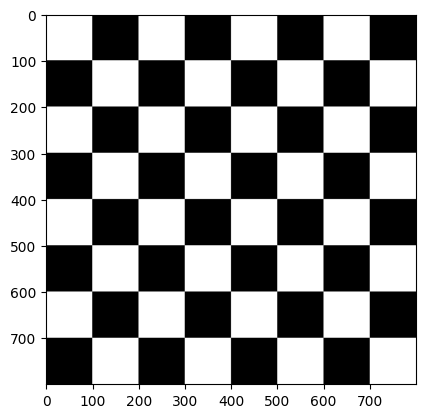

In [3]:

alto = 800
ancho = 800
img = np.zeros((alto,ancho,1), dtype = np.uint8)

inicio_x = 0
inicio_y = 0

for x in range(0,ancho+100,100):
    for y in range(0,alto+100,100):
        if (y%200 != 0  and x%200 !=0) or (y%200 == 0  and x%200 ==0):
            img[inicio_y:y,inicio_x:x,0] = 255
            continue
        inicio_y = y
    inicio_x = x

print(img.shape)

plt.imshow(img, cmap="gray") 
plt.show()

## Crear una imagen estilo Mondrian 

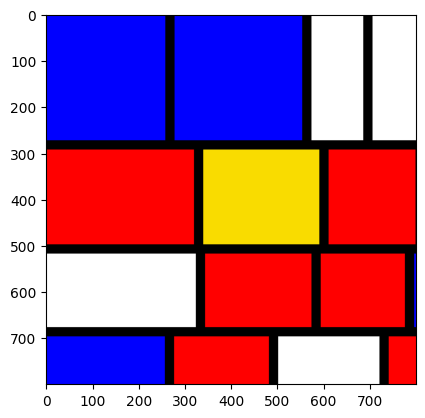

In [4]:
colors = [(255,0,0),(255,255,255),(0,0,255),(249, 220, 0)]
alto = 800
ancho = 800
img = np.zeros((alto,ancho,3), dtype = np.uint8)

random_ancho = np.random.randint(50,ancho//4,1)[0]
random_alto = np.random.randint(50,alto//4,1)[0]

inicio_y = 0
gap = 20

for y in range(200,alto+100, 200):

    inicio_x = 0

    for x in range(200,ancho+100, 200):

        random_color = np.random.randint(0,4,1)[0]
        img[inicio_y:y+random_alto, inicio_x:x+random_ancho] = colors[random_color]
        inicio_x = x + random_ancho +gap
        random_ancho = np.random.randint(50,ancho/4,1)[0]

    inicio_y = y+ random_alto + gap
    random_alto = np.random.randint(50,alto/4,1)[0]

plt.imshow(img) 
plt.show()

## Hacer uso de las funciones de dibujo de OpenCV con el ejercicio Mondrian

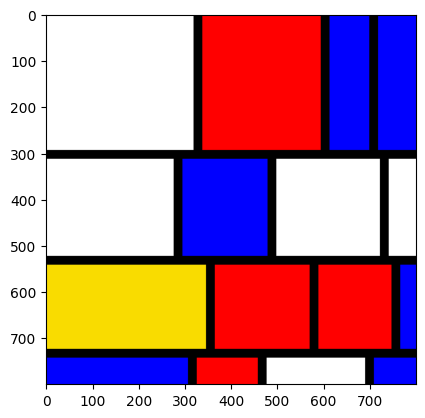

In [5]:
colors = [(255,0,0),(255,255,255),(0,0,255),(249, 220, 0)]
alto = 800
ancho = 800
img = np.zeros((alto,ancho,3), dtype = np.uint8)

random_ancho = np.random.randint(50, ancho/4, 1)[0]
random_alto = np.random.randint(50, alto/4, 1)[0]

inicio_y = 0
gap = 20

for y in range(200,alto+100, 200):

    inicio_x = 0

    for x in range(200,ancho+100, 200):

        random_color = np.random.randint(0,4,1)[0]
        cv2.rectangle(img,(inicio_x,inicio_y),(x+ random_ancho,y+random_alto),colors[random_color],-1)
        inicio_x = x + random_ancho + gap
        random_ancho = np.random.randint(50,ancho/4,1)[0]

    inicio_y = y + random_alto + gap
    random_alto = np.random.randint(50,alto/4,1)[0]

plt.imshow(img) 
plt.show()

## Modifica de forma libre los valores de un plano de la imagen

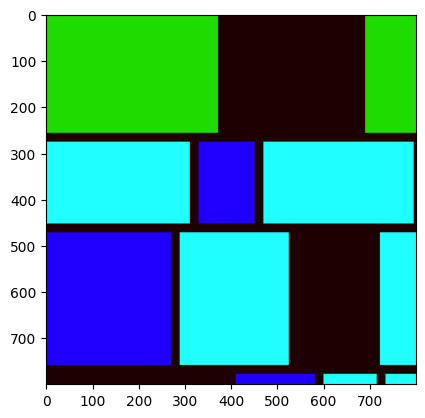

In [6]:
colors = [(255,0,0),(255,255,255),(0,0,255),(249, 220, 0)]
alto = 800
ancho = 800
img = np.zeros((alto,ancho,3), dtype = np.uint8)

random_ancho = np.random.randint(50, ancho//4, 1)[0]
random_alto = np.random.randint(50 ,alto//4, 1)[0]

inicio_y = 0
gap = 20

for y in range(200, alto + 100, 200):
    inicio_x = 0
    for x in range(200,ancho+100, 200):
        random_color = np.random.randint(0,4,1)[0]
        cv2.rectangle(img,(inicio_x,inicio_y),(x+ random_ancho,y+random_alto),colors[random_color],-1)
        inicio_x = x + random_ancho + gap
        random_ancho = np.random.randint(50,ancho//4,1)[0]
    inicio_y = y + random_alto + gap
    random_alto = np.random.randint(50,alto//4,1)[0]

# cambia el plano rojo a un valor aleatorio
img[:, :, 0] = np.random.randint(0, 256, 1)

plt.imshow(img) 
plt.show()


## Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 

In [12]:

# Carga la imagen
img = cv2.imread('image_2.png')

# Convierte la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Encuentra el píxel más brillante y el más oscuro
brightest_pixel = np.max(gray)
darkest_pixel = np.min(gray)

# Obtiene las coordenadas del píxel más brillante y el más oscuro
brightest_coords = np.where(gray == brightest_pixel)
darkest_coords = np.where(gray == darkest_pixel)

# Extrae las coordenadas x e y del píxel más brillante y el más oscuro
x_brightest, y_brightest = brightest_coords[1][0], brightest_coords[0][0]

x_darkest, y_darkest = darkest_coords[1][0], darkest_coords[0][0]

# Marca el píxel más brillante y el más oscuro en la imagen original
cv2.circle(img, (x_brightest, y_brightest), 5, (0, 255, 0), -1) 
cv2.circle(img, (x_darkest, y_darkest), 5, (255, 0, 0), -1) 

# Muestra la salida
cv2.imshow('Imagen', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[253 253 253 ...  99  99  99]
 [253 253 253 ...  99  99  99]
 [253 253 253 ...  99  99  99]
 ...
 [135 135 135 ... 134 135 136]
 [135 135 135 ... 135 136 138]
 [135 135 135 ... 137 140 143]]
255
3
88 12


### ¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [10]:

# Carga la imagen
img = cv2.imread('image_2.png')

# Dimensiones
altura, ancho = img.shape[:2]

# Convierte la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Reduccion de las imagenes entre 8
img_resized = cv2.resize(gray, (ancho // 8, altura //8), interpolation=cv2.INTER_AREA)

# Encuentra el píxel más brillante y el más oscuro
brightest_pixel = np.max(img_resized) 
darkest_pixel = np.min(img_resized) 

# Obtiene las coordenadas del píxel más brillante y el más oscuro
brightest_coords = np.where(img_resized == brightest_pixel) 
darkest_coords = np.where(img_resized == darkest_pixel) 

# Extrae las coordenadas x e y del píxel más brillante y el más oscuro
x_brightest, y_brightest = brightest_coords[1][0] * 8, brightest_coords[0][0] * 8
x_darkest, y_darkest = darkest_coords[1][0] * 8, darkest_coords[0][0] * 8

# Marca el píxel más brillante y el más oscuro en la imagen original
cv2.circle(img, (x_brightest, y_brightest), 8, (0, 255, 0), -1) 
cv2.circle(img, (x_darkest, y_darkest), 8, (255, 0, 0), -1) 

# Muestra la salida
cv2.imshow('Imagen', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Propuesta pop art con la entrada de la cámara web o vídeo

In [1]:
# Interactivo apreta q  o  e en el teclado

def aplicar_pop_art(frame, index):
    color_maps = [
        cv2.COLORMAP_AUTUMN, 
        cv2.COLORMAP_BONE, 
        #cv2.COLORMAP_JET,
        cv2.COLORMAP_WINTER, 
        cv2.COLORMAP_OCEAN, 
        cv2.COLORMAP_SUMMER, 
        cv2.COLORMAP_SPRING, 
        cv2.COLORMAP_COOL, 
        #cv2.COLORMAP_HSV, 
        cv2.COLORMAP_PINK, 
        #cv2.COLORMAP_PARULA, 
        #cv2.COLORMAP_MAGMA, 
        cv2.COLORMAP_INFERNO, 
        #cv2.COLORMAP_PLASMA, 
        cv2.COLORMAP_VIRIDIS, 
        cv2.COLORMAP_CIVIDIS, 
        cv2.COLORMAP_TWILIGHT, 
        cv2.COLORMAP_TWILIGHT_SHIFTED,
        #cv2.COLORMAP_TURBO, 
        cv2.COLORMAP_DEEPGREEN]
    
    # Convertir el frame a escala de grises antes de aplicar el map
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Aplicar el map de color usando el índice
    color_map = color_maps[index % len(color_maps)]
    
    # Retorna el frame con el map de color aplicado
    return cv2.applyColorMap(gray_frame, color_map)

def posicionar_celdas(alto, ancho, num_filas, num_columnas, espacio):
    cel_list = []
    
    # Calcula el tamaño disponible para cada celda después de considerar los espacios
    total_alto = alto - (num_filas - 1) * espacio
    total_ancho = ancho - (num_columnas - 1) * espacio
    
    # Calcula el tamaño de cada celda de forma que ocupe todo el espacio
    cel_alto = total_alto // num_filas
    cel_ancho = total_ancho // num_columnas
    
    for fila in range(num_filas):
        for columna in range(num_columnas):
            # Posición inicial para cada marco, considerando el espacio
            inicio_x = columna * (cel_ancho + espacio)
            inicio_y = fila * (cel_alto + espacio)
            
            # Añadir la posición y el tamaño del marco
            cel_list.append({
                'pos': (inicio_y, inicio_x),
                'size': (cel_alto, cel_ancho)  # (alto, ancho) para la imagen redimensionada
            })
    
    return cel_list

def actualizar_collage(collage, cell_list, frame):
    # Limpiar el collage
    collage[:, :] = 0
    
    for idx, item in enumerate(cell_list):
        pos = item['pos']
        size = item['size']
        y, x = pos
        h, w = size
        
        # Verificar si el tamaño del frame no excede el collage
        if y + h > collage.shape[0] or x + w > collage.shape[1]:
            continue
        
        # Redimensionar el frame a las dimensiones del marco
        resized_frame = cv2.resize(frame, (w, h))
        
        # Aplicar el mapeo de color para darle estilo "pop art"
        mapped_frame = aplicar_pop_art(resized_frame, idx)
        
        # Colocar el frame en el collage
        collage[y:y + h, x:x + w] = mapped_frame

# Captura de video
vid = cv2.VideoCapture(0)

# Dimensiones de la cámara
ancho = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
alto = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Forzar a mitad de resolución para ocupar menos pantalla
ancho = int(ancho / 2)
alto = int(alto / 2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, ancho)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, alto)

# Parámetros de la cuadrícula
num_filas = 4
num_columnas = 4
espacio = 2  # Espacio constante entre marcos

# Imagen conjunta 2x original
collage = np.zeros((alto * 2, ancho * 2, 3), dtype=np.uint8)

# Posicionar las celdas
cel_list = posicionar_celdas(alto * 2, ancho * 2, num_filas, num_columnas, espacio)

while True:
    ret, frame = vid.read()
    if not ret:
        break

    # Actualizar el collage con el nuevo frame
    actualizar_collage(collage, cel_list, frame)

    cv2.imshow('Pop Art Webcam', collage)

    key =  cv2.waitKey(20)
    
    #Aumentar por 2 el numero de filas y columnas
    if key == ord('e') and (num_filas < 32):
        num_filas *= 2
        num_columnas *= 2
        cel_list = posicionar_celdas(alto * 2, ancho * 2, num_filas, num_columnas, espacio)
    
    #Disminuir entre 2 el numero de filas y columnas
    if key == ord('q') and (num_filas > 1):
        num_filas //= 2
        num_columnas //= 2
        cel_list = posicionar_celdas(alto * 2, ancho * 2, num_filas, num_columnas, espacio)
    
    #Terminar ejecución
    if key == 27:
        break

vid.release()
cv2.destroyAllWindows()
